<a href="https://colab.research.google.com/github/MK316/Workingpapers/blob/main/ksat_readablity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KSAT lexical analysis (Part 2)

## [1] Data to read, add number of string, splitted words

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 117 kB 7.8 MB/s 


In [5]:
url = 'https://raw.githubusercontent.com/MK316/Workingpapers/main/Analysis/ksatdata_12only.csv'
df1 = pd.read_csv(url)
df2 = df1

In [8]:
# Added column: String length
length = []

for i in range(0, len(df2['Passage'])):
  LEN = len(df2['Passage'][i])
  length.append(LEN)

df2['String'] = length

In [9]:
# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df2['Passage'])):
  TSP = df2['Passage'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df2['Splits'] = tsplit
df2['N_Splits'] = splen

In [12]:
# Added column: String length
lem = []

for i in range(0, len(df2['Passage'])):
  LEM = ld.flemmatize(df2['Passage'][i])
  lem.append(LEM)

df2['Lemma'] = lem

In [ ]:
df3 = df2[['Year','Category','QN','Passage','Splits','Lemma','String','N_Splits']]
df3

## [2] LD indices: adding LD indices (10 types) to the dataset

In [ ]:
# ADD LD indices

#1. Create empty lists.
TTR = []
RTTR = []
LogTTR = []
MSTTR = []
FDTTR = []
MATTR = []
HDD = []
MTLD = []
BILOG = []
MA = []

# 2. Getting LD index values for each cell:

for i in range(0, len(df3['Lemma'])):
  flt = df3['Lemma'][i]
  ttr = ld.ttr(flt)
  rttr = ld.root_ttr(flt)
  logttr = ld.log_ttr(flt)
  msttr = ld.maas_ttr(flt)
  fdttr = ld.msttr(flt)
  mattr = ld.mattr(flt)
  hdd = ld.hdd(flt)
  mtld = ld.mtld(flt)
  bilog = ld.mtld_ma_wrap(flt)
  ma = ld.mtld_ma_bid(flt)

  # Add values to each list
  TTR.append(ttr)
  RTTR.append(rttr)
  LogTTR.append(logttr)
  MSTTR.append(msttr)
  FDTTR.append(fdttr)
  MATTR.append(mattr)
  HDD.append(hdd)
  MTLD.append(mtld)
  BILOG.append(bilog)
  MA.append(ma)

# Add columns
df3['TTR'] = TTR
df3['RTTR'] = RTTR
df3['LogTTR'] = LogTTR
df3['MSTTR'] = MSTTR
df3['FDTTR'] = FDTTR
df3['MATTR'] = MATTR
df3['HDD'] = HDD
df3['MTLD'] = MTLD
df3['BILOG'] = BILOG
df3['MA'] = MA

In [19]:
df3.describe()

,Year,String,N_Splits,TTR,RTTR,LogTTR,MSTTR,FDTTR,MATTR,HDD,MTLD,BILOG,MA
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2018.500000,925.312500,151.648438,0.605471,7.417595,0.899153,0.046290,0.771536,0.770702,0.802420,70.465927,70.750469,63.347698
std,2.300291,152.155057,20.306157,0.056931,0.666567,0.018109,0.007980,0.048950,0.045449,0.039086,19.495300,20.041444,18.757406
min,2015.000000,575.000000,105.000000,0.451282,5.376082,0.843935,0.032568,0.630000,0.581905,0.686500,33.165609,32.157895,0.000000
25%,2016.750000,820.500000,135.750000,0.569889,7.000837,0.888727,0.040028,0.745000,0.750179,0.779164,56.232643,57.424318,52.435550
50%,2018.500000,950.000000,154.500000,0.603484,7.383389,0.898958,0.046482,0.776667,0.775913,0.807191,69.453261,68.756833,62.218431
75%,2020.250000,1046.250000,166.250000,0.647586,7.862256,0.913771,0.050668,0.801667,0.801374,0.830868,83.217863,83.409023,73.543475
max,2022.000000,1264.000000,195.000000,0.728972,9.071147,0.932349,0.073482,0.890000,0.866111,0.880651,128.591868,122.560510,110.240000


df4 = selected columns with numeric measures
=> For correlation table

In [31]:
# df4 = numeric data columns
df4 = df3.iloc[:,-12:-1]; df4

,String,N_Splits,TTR,RTTR,LogTTR,MSTTR,FDTTR,MATTR,HDD,MTLD,BILOG
0,1069,154,0.519481,6.446584,0.869976,0.059439,0.706667,0.688381,0.708912,39.029817,38.831169
1,1086,180,0.561111,7.528096,0.888727,0.049339,0.780000,0.750076,0.788483,57.070312,62.005556
2,1052,154,0.681818,8.461141,0.923963,0.034759,0.846667,0.812571,0.871256,106.436537,111.837662
3,1052,154,0.681818,8.461141,0.923963,0.034759,0.846667,0.812571,0.871256,106.436537,111.837662
4,1171,175,0.685714,9.071147,0.926949,0.032568,0.806667,0.806984,0.839168,98.199129,119.142857
...,...,...,...,...,...,...,...,...,...,...,...
123,578,105,0.685714,7.026481,0.918931,0.040110,0.810000,0.766786,0.810360,83.649431,76.466667
124,627,113,0.663717,7.055407,0.913293,0.042233,0.830000,0.799063,0.837067,73.332384,78.893805
125,736,119,0.630252,6.875239,0.903406,0.046539,0.790000,0.804286,0.813637,76.120146,73.680672
126,666,128,0.664062,7.513010,0.915627,0.040040,0.790000,0.783291,0.820006,79.756780,79.500000


In [33]:
corr = df4.corr()
#print(corr)
corr.style.background_gradient(cmap='coolwarm')

,String,N_Splits,TTR,RTTR,LogTTR,MSTTR,FDTTR,MATTR,HDD,MTLD,BILOG
String,1.000000,0.899812,-0.321593,0.382570,-0.199667,0.068867,0.079119,0.106473,0.039487,0.059648,0.043348
N_Splits,0.899812,1.000000,-0.446087,0.320051,-0.315263,0.171895,0.026346,0.061211,-0.043332,-0.028105,-0.040977
TTR,-0.321593,-0.446087,1.000000,0.700513,0.988333,-0.956415,0.694596,0.730214,0.830435,0.767879,0.823749
RTTR,0.382570,0.320051,0.700513,1.000000,0.793559,-0.871970,0.743266,0.809551,0.836221,0.779570,0.832387
LogTTR,-0.199667,-0.315263,0.988333,0.793559,1.000000,-0.988760,0.741272,0.789070,0.875018,0.800111,0.853591
MSTTR,0.068867,0.171895,-0.956415,-0.871970,-0.988760,1.000000,-0.773436,-0.830223,-0.903103,-0.826144,-0.880076
FDTTR,0.079119,0.026346,0.694596,0.743266,0.741272,-0.773436,1.000000,0.888056,0.853276,0.852448,0.843242
MATTR,0.106473,0.061211,0.730214,0.809551,0.789070,-0.830223,0.888056,1.000000,0.895189,0.825946,0.855742
HDD,0.039487,-0.043332,0.830435,0.836221,0.875018,-0.903103,0.853276,0.895189,1.000000,0.861979,0.899405
MTLD,0.059648,-0.028105,0.767879,0.779570,0.800111,-0.826144,0.852448,0.825946,0.861979,1.000000,0.934258


# [3] Readability indices

In [37]:
!pip install textstat
import textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Readability indices

In [ ]:
textstat.syllable_count(text)
textstat.lexicon_count(text, removepunct=True))
textstat.sentence_count(text)

In [ ]:
# a

In [ ]:
# textstat.flesch_reading_ease(text)
# textstat.flesch_kincaid_grade(excerpt_min)
# textstat.gunning_fog(excerpt_min)
# textstat.automated_readability_index(excerpt_min)
# textstat.coleman_liau_index(excerpt_min)
# textstat.linsear_write_formula(excerpt_min)
# textstat.dale_chall_readability_score(excerpt_min)
# textstat.text_standard(excerpt_min)

Readability Indices:
FRE: Flesch Reading Ease score

In [39]:
from typing import TextIO
FRE = []
FKG = []
GF = []
ARI = []
CLI = []
LWF = []
DCRS = []
TS = []

for i in range(0, len(df2['Passage'])):
  text = df2['Passage'][i]
  fre = textstat.flesch_reading_ease(text)
  fkg = textstat.flesch_kincaid_grade(text)
  gf = textstat.gunning_fog(text)
  ari = textstat.automated_readability_index(text)
  cli = textstat.coleman_liau_index(text)
  lwf = textstat.linsear_write_formula(text)
  dcrs = textstat.dale_chall_readability_score(text)
  ts = textstat.text_standard(text)

  FRE.append(fre)
  FKG.append(fkg)
  GF.append(gf)
  ARI.append(ari)
  CLI.append(cli)
  LWF.append(lwf)
  DCRS.append(dcrs)
  TS.append(ts)


df3['FRE'] = FRE
df3['FKG'] = FKG
df3['GF'] = GF
df3['ARI'] = ARI
df3['CLI'] = CLI
df3['LWF'] = LWF
df3['DCRS'] = DCRS
df3['TS'] = TS


In [40]:
df3

,Year,Category,QN,Passage,Splits,Lemma,String,N_Splits,TTR,RTTR,...,BILOG,MA,FRE,FKG,GF,ARI,CLI,LWF,DCRS,TS
0,2022,Context,Q40,Philip Kitcher and Wesley Salmon have suggeste...,"[Philip, Kitcher, and, Wesley, Salmon, have, s...","[philip, kitcher, and, wesley, salmon, have, s...",1069,154,0.519481,6.446584,...,38.831169,34.360697,18.05,15.5,15.25,16.2,16.53,15.600000,9.62,15th and 16th grade
1,2021,Context,Q40,From a cross-cultural perspective the equation...,"[From, a, cross-cultural, perspective, the, eq...","[from, a, crosscultural, perspective, the, equ...",1086,180,0.561111,7.528096,...,62.005556,51.710000,44.75,11.5,13.64,11.3,10.90,10.428571,8.56,10th and 11th grade
2,2020,Context,Q40,"Biological organisms, including human societie...","[Biological, organisms,, including, human, soc...","[biological, organism, include, human, society...",1052,154,0.681818,8.461141,...,111.837662,83.236071,14.83,18.8,20.89,21.5,16.26,23.666667,11.83,18th and 19th grade
3,2019,Context,Q40,"Biological organisms, including human societie...","[Biological, organisms,, including, human, soc...","[biological, organism, include, human, society...",1052,154,0.681818,8.461141,...,111.837662,83.236071,14.83,18.8,20.89,21.5,16.26,23.666667,11.83,18th and 19th grade
4,2018,Context,Q40,Time spent on on-line interaction with members...,"[Time, spent, on, on-line, interaction, with, ...","[time, spend, on, online, interaction, with, m...",1171,175,0.685714,9.071147,...,119.142857,104.332063,19.03,19.3,23.37,22.9,15.85,18.250000,11.87,19th and 20th grade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2019,Context,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m...","[Dear, Mr., Reese,, A, few, days, ago,, I, sub...","[dear, mr, reese, a, few, day, ago, i, submit,...",578,105,0.685714,7.026481,...,76.466667,62.060588,83.56,4.9,7.14,6.4,7.12,7.571429,7.59,7th and 8th grade
124,2018,Context,Q18,"Dear Ms. Diane Edwards,\nI am a teacher workin...","[Dear, Ms., Diane, Edwards,, I, am, a, teacher...","[dear, ms, diane, edwards, i, be, a, teacher, ...",627,113,0.663717,7.055407,...,78.893805,63.557692,74.08,6.4,8.12,7.1,7.94,10.166667,7.55,7th and 8th grade
125,2017,Context,Q18,Want to improve your Korean writing? Writing i...,"[Want, to, improve, your, Korean, writing?, Wr...","[want, to, improve, your, korean, writing, wri...",736,119,0.630252,6.875239,...,73.680672,70.791103,59.40,7.9,9.80,9.0,11.06,6.333333,8.61,8th and 9th grade
126,2016,Context,Q18,"Dear Coach Johnson,\nMy name is Christina Mark...","[Dear, Coach, Johnson,, My, name, is, Christin...","[dear, coach, johnson, my, name, be, christina...",666,128,0.664062,7.513010,...,79.500000,67.593462,86.74,5.7,8.88,7.5,6.44,11.000000,6.52,5th and 6th grade


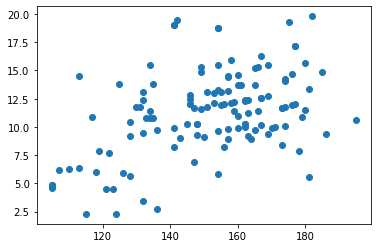

In [46]:
a1 = df3[['N_Splits','FKG']]
plt.scatter(a1.N_Splits, a1.FKG)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3980323610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3980334e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3980323bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3980334550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3980340e10>],
 'means': []}

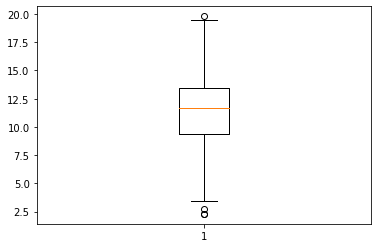

In [48]:
plt.boxplot(a1.FKG)

(array([ 5.,  8., 11., 11., 37., 30., 14.,  6.,  4.,  2.]),
 array([ 4.12 ,  6.045,  7.97 ,  9.895, 11.82 , 13.745, 15.67 , 17.595,
        19.52 , 21.445, 23.37 ]),
 <a list of 10 Patch objects>)

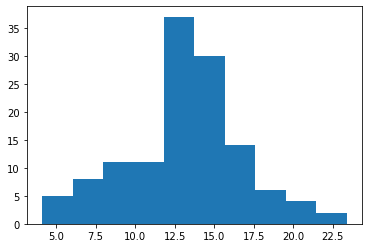

In [52]:
plt.hist(df3.GF)

In [54]:
# importing the required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

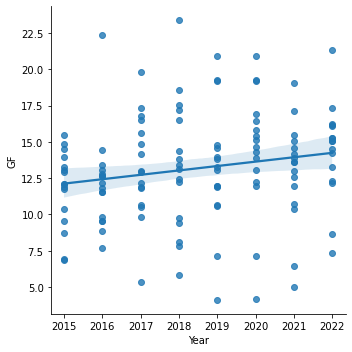

In [57]:
df = df3
 
# scatter plot with regression
# line(by default)
sns.lmplot(x ='Year', y ='GF', data = df)
 
# Show the plot
plt.show()